# Mall Costumer Clustering

The goal of this notebook is to perform customer segmentation using clustering algorithms. Customer segmentation is the process of dividing customers into distinct groups based on shared characteristics so businesses can tailor their marketing and offerings accordingly.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [54]:
data=pd.read_csv('../../data/008/Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
data=data.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})

In [57]:
data['Gender']=data['Gender'].apply(lambda x: 1 if x == "Male" else 0)

In [58]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [59]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=pd.DataFrame(data=scaler.fit_transform(data),columns=data.columns)

In [62]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

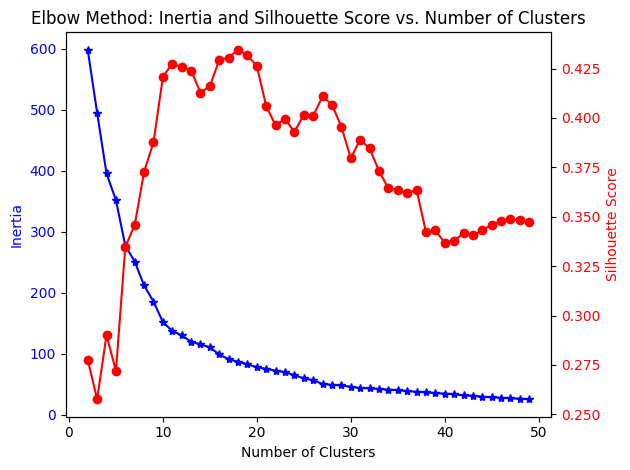

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Create the plot
fig, ax1 = plt.subplots()

# Plot inertia on the first y-axis
ax1.plot(range(2, 50), inertia_values, 'b-*', label='Inertia')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot silhouette scores
ax2 = ax1.twinx()
ax2.plot(range(2, 50), silhouette_scores, 'r-o', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and show the plot
plt.title('Elbow Method: Inertia and Silhouette Score vs. Number of Clusters')
fig.tight_layout()  # Adjust layout to prevent label overlap
plt.show()



In [64]:
optimal_k = np.argmax(silhouette_scores) + 2  
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 18


from the plots the optimal cluster number is 10

In [65]:
optimal_k=12

In [66]:
pca = PCA(n_components=2)

In [94]:
data_pca=pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])

In [92]:
def plot_clusters(X, labels, title):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='Set1_r', marker='o', s=50, alpha=0.9)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

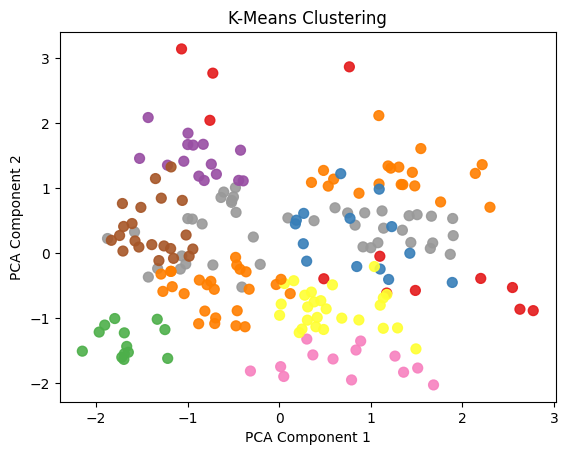

In [95]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

plot_clusters(data_pca, kmeans_labels, 'K-Means Clustering')

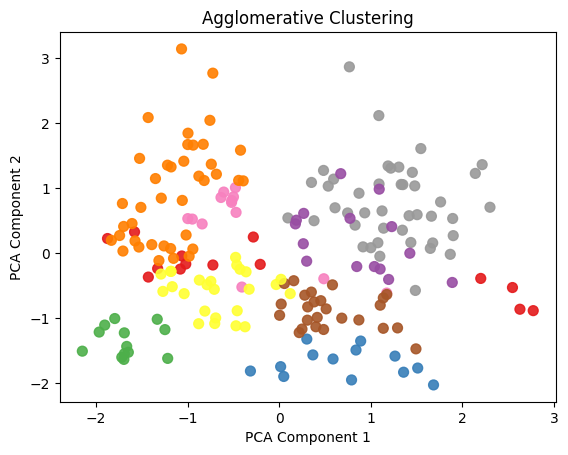

In [96]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(data)
plot_clusters(data_pca, agglo_labels, 'Agglomerative Clustering')

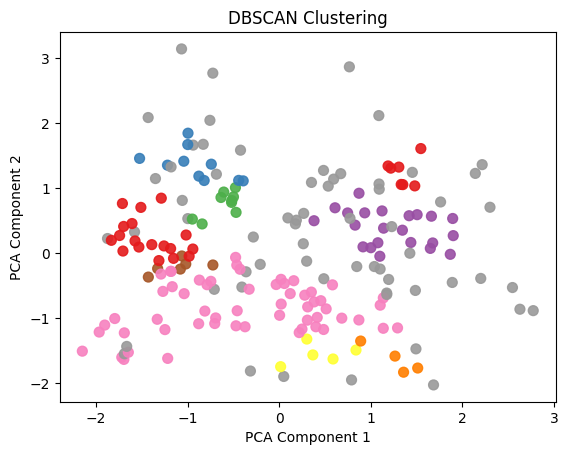

In [101]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)
plot_clusters((data_pca), dbscan_labels, 'DBSCAN Clustering')

from the dbscan plot we can see that many datapoints are considered as noise

In [102]:
algorithms = {
    'K-Means': kmeans_labels,
    'Agglomerative': agglo_labels,
    'DBSCAN': dbscan_labels
}

for name, labels in algorithms.items():
    if len(set(labels)) > 1:  # Avoid calculating metrics when all points are in one cluster
        silhouette_avg = silhouette_score(data_pca, labels)
        davies_bouldin = davies_bouldin_score(data_pca, labels)
        print(f"{name} - Silhouette Score: {silhouette_avg:.3f}, Davies-Bouldin Index: {davies_bouldin:.3f}")
    else:
        print(f"{name} - Only one cluster found, skipping metrics")

K-Means - Silhouette Score: 0.211, Davies-Bouldin Index: 1.405
Agglomerative - Silhouette Score: 0.196, Davies-Bouldin Index: 1.491
DBSCAN - Silhouette Score: -0.132, Davies-Bouldin Index: 1.450


K-Means outperformed the other methods on both metrics, though its silhouette score indicates that the clusters are not strongly separated.